# How-to: Run an existing model

In [1]:
# Third party libraries
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Import local module
import multyscale

In [2]:
# %% Load example stimulus
stimulus = np.asarray(Image.open("example_stimulus.png").convert("L"))

# %% Parameters of image
shape = stimulus.shape  # filtershape in pixels
# visual extent, same convention as pyplot:
visextent = (-16, 16, -16, 16)

## Integrated run

In [3]:
model = multyscale.models.FLODOG_RHS2007(shape, visextent)

In [4]:
output = model.apply(stimulus)

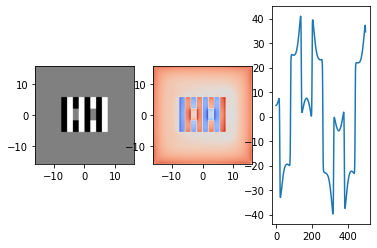

In [7]:
plt.subplot(1, 3, 1)
plt.imshow(stimulus, cmap="gray", extent=visextent)
plt.subplot(1, 3, 2)
plt.imshow(output, cmap="coolwarm", extent=visextent)
plt.subplot(1, 3, 3)
plt.plot(output[512, 250:750])

## Step-wise execution

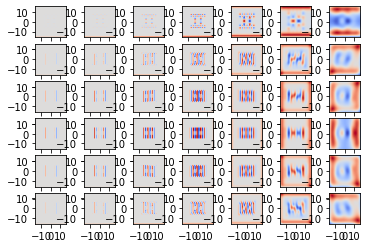

In [8]:
filters_output = model.bank.apply(stimulus)

for i in range(filters_output.shape[0]):
    for j in range(filters_output.shape[1]):
        plt.subplot(
            filters_output.shape[0],
            filters_output.shape[1],
            i * filters_output.shape[0] + ((j + i) * 1) + 1,
        )
        plt.imshow(filters_output[i, j, ...], cmap="coolwarm", extent=visextent)

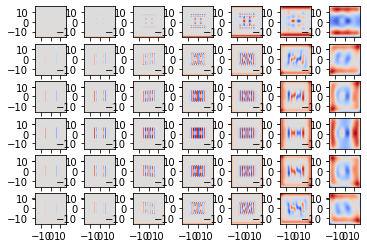

In [9]:
weighted_outputs = model.weight_outputs(filters_output)

for i in range(weighted_outputs.shape[0]):
    for j in range(weighted_outputs.shape[1]):
        plt.subplot(
            weighted_outputs.shape[0],
            weighted_outputs.shape[1],
            i * weighted_outputs.shape[0] + ((j + i) * 1) + 1,
        )
        plt.imshow(weighted_outputs[i, j, ...], cmap="coolwarm", extent=visextent)

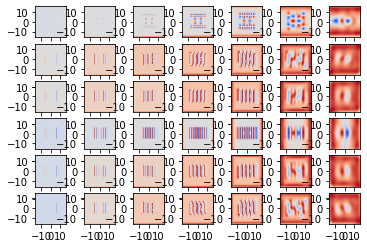

In [10]:
normalized_outputs = model.normalize_outputs(weighted_outputs)

for i in range(normalized_outputs.shape[0]):
    for j in range(normalized_outputs.shape[1]):
        plt.subplot(
            normalized_outputs.shape[0],
            normalized_outputs.shape[1],
            i * normalized_outputs.shape[0] + ((j + i) * 1) + 1,
        )
        plt.imshow(normalized_outputs[i, j, ...], cmap="coolwarm", extent=visextent)

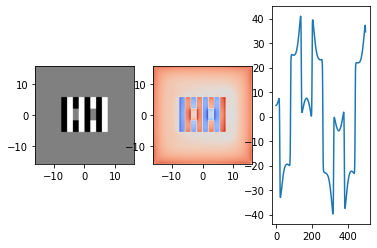

In [11]:
output = normalized_outputs.sum((0,1))

plt.subplot(1, 3, 1)
plt.imshow(stimulus, cmap="gray", extent=visextent)
plt.subplot(1, 3, 2)
plt.imshow(output, cmap="coolwarm", extent=visextent)
plt.subplot(1, 3, 3)
plt.plot(output[512, 250:750])

## Non-default parameters

In [ ]:
model.spatial_window_scalar = 3
model.sdmix = .75
model.scale_norm_weights = multyscale.normalization.scale_norm_weights_gaussian(
    len(model.scale_weights), model.sdmix
)
model.normalization_weights = multyscale.normalization.create_normalization_weights(
    6, 7, model.scale_norm_weights, model.orientation_norm_weights
)
model.window_sigmas = np.broadcast_to(
    np.array(model.center_sigmas)[None, ..., None], (6, 7, 2)
)

In [ ]:
ouput = model.apply(stimulus)

plt.subplot(1, 3, 1)
plt.imshow(stimulus, cmap="gray", extent=visextent)
plt.subplot(1, 3, 2)
plt.imshow(output, cmap="coolwarm", extent=visextent)
plt.subplot(1, 3, 3)
plt.plot(output[512, 250:750])